# <center> FINAL PROJECT: STUDENT PERFORMANCE FACTORS <center> 

## A. INFORMATION

### I. Member Information


<center>

|No. | Name          | Student ID   | Email                    |
|:--:|:-------------:|:------------:|:------------------------:|
| 1  | Võ Hùng Khoa  | 22127202     | vhkhoa22@clc.fitus.edu.vn|
| 2  | Vũ Tuấn Hùng  | 22127137     | vthung22@clc.fitus.edu.vn|
| 3  | Huỳnh Tấn Đạt | 22127059     | htdat222@clc.fitus.edu.vn|

<center>

### II. Project Information 
#### 1. Project Introduction 
- In this project, students are required to select a public dataset, such as those available on *Kaggle*, related to a topic of interest to their group. The project involves exploring the dataset, which often includes preprocessing steps, and identifying meaningful questions that can be answered using the data. Students are then tasked with preprocessing and analyzing the data to address each question effectively, demonstrating their ability to draw insights and conclusions from the analysis.

#### 2. Topic
- The chosen topic: **Student Performance Factors** 

- Using a dataset that covers study habits, attendance, parental involvement, and other factors, the project aims to analyze how these aspects impact students' exam performance.


## B. Project Details

### I. Import Library and Read Dataset

#### 1. Import Library 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
%matplotlib inline

# Import more library if you need it
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

Import the necessary libraries for data manipulation, visualization, and mathematical computations. These libraries provide essential functions for handling datasets and analyzing data.



#### 2. Read Dataset

In [2]:
data =  pd.read_csv("./StudentPerformanceFactors.csv")
data.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

The dataset is loaded from a `CSV` file using `Pandas`. This allows us to work with the data as a `DataFrame`, making it easier to manipulate and analyze.

### II. Data Preprocessing

#### **1. Hanlde Null and Duplicate Values**

##### *1.1. Data Overview*

To get a big-picture view of the data, we can use the `info()` function to display dataset information, including the **column names**, **data types**, **non-null counts**, and memory usage. This helps us identify any potential issues, such as **missing values** or **incorrect data types**.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**Comment**: There are some null values in the dataset, so we are going to drop them all.

##### *1.2. Handle Missing Value*
*Missing values can introduce bias or errors in analysis. Rows with missing values are dropped to ensure the dataset is complete.*

**Potential Issues Caused by Missing Values:**
- **Bias:** Missing data can lead to biased results if the absence of values is not random.
- **Reduced Sample Size:** Retaining rows with missing values reduces the effective size of the dataset, limiting the statistical power of analysis.
- **Errors in Machine Learning Models:** Models may fail to train or make incorrect predictions due to incomplete data.

**Conclusion:** Dropping rows with missing values ensures the dataset is reliable and suitable for downstream tasks.

In [4]:
# Drop null-value
data.dropna(axis = 0 , inplace=True)

In [5]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

**Comment:** There are **no null values** in the `dataset`, which indicates that we can confidently proceed to the next step in the preprocessing pipeline without concerns about incomplete data impacting our analysis.

##### *1.3. Remove duplicate rows*
*Duplicate rows can distort analysis by giving undue weight to repeated data points. Duplicates are identified and removed to maintain data integrity.*

**Why Remove Duplicates?**
- **Data Integrity:** Duplicate rows can skew the statistical distribution of data.
- **Accuracy in Machine Learning Models:** Repeated data points may cause models to overfit or misinterpret trends.
- **Efficiency:** Removing duplicates reduces computational overhead, especially in large datasets.

**Example:** If the same student's performance data is recorded multiple times, their scores may have undue influence on statistical summaries or model predictions.

To maintain the `accuracy` and `reliability` of the dataset, duplicates are **identified** and **removed.**


In [6]:
data.drop_duplicates(inplace=True)

#### **2. Handle Categorical Columns and Ouliers**

##### *2.1. Overview* 

*To completing the data preprocessing, we need to handle the object values and convert them to numeric values. Firstly, we need to learn more about the dataset we are going to handle.*

<center>

| Attribute                | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Hours_Studied            | Number of hours spent studying per week.                                    |
| Attendance               | Percentage of classes attended.                                             |
| Parental_Involvement     | Level of parental involvement in the student's education (Low, Medium, High).|
| Access_to_Resources      | Availability of educational resources (Low, Medium, High).                 |
| Extracurricular_Activities| Participation in extracurricular activities (Yes, No).                      |
| Sleep_Hours              | Average number of hours of sleep per night.                                 |
| Previous_Scores          | Scores from previous exams.                                                 |
| Motivation_Level         | Student's level of motivation (Low, Medium, High).                          |
| Internet_Access          | Availability of internet access (Yes, No).                                  |
| Tutoring_Sessions        | Number of tutoring sessions attended per month.                             |
| Family_Income            | Family income level (Low, Medium, High).                                   |
| Teacher_Quality          | Quality of the teachers (Low, Medium, High).                               |
| School_Type              | Type of school attended (Public, Private).                                  |
| Peer_Influence           | Influence of peers on academic performance (Positive, Neutral, Negative).   |
| Physical_Activity        | Average number of hours of physical activity per week.                      |
| Learning_Disabilities    | Presence of learning disabilities (Yes, No).                               |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate).   |
| Distance_from_Home       | Distance from home to school (Near, Moderate, Far).                         |
| Gender                   | Gender of the student (Male, Female).                                       |
| Exam_Score               | Final exam score.                                                           |

<center>

##### *2.2. Convert categorical data type to numeric data type* 

**Why:** Numerical data allows statistical and machine learning algorithms to process the information effectively.

**Mappings used:**
- `Low`/`Medium`/`High` -> 0/1/2 (Ordinal mapping for levels)
- `High School`/`College`/`Postgraduate` -> 0/1/2 (Ordinal mapping for education levels)
- `Near`/`Moderate`/`Far` -> 0/1/2 (Ordinal mapping for distances)
- `Positive`/`Neutral`/`Negative` -> 2/1/0 (Ordinal mapping for sentiments)

**Step 1**: Define ordinal mappings for specific columns


In [7]:
# Define ordinal mappings for specific columns.

ordinal_mapping = {"Low": 0, "Medium": 1, "High": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(ordinal_mapping.keys()):  
        data[column] = data[column].map(ordinal_mapping)

education_mapping = {"High School": 0, "College": 1, "Postgraduate": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(education_mapping.keys()):  
        data[column] = data[column].map(education_mapping)

distance_mapping = {"Near": 0, "Moderate": 1, "Far": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(distance_mapping.keys()):  
        data[column] = data[column].map(distance_mapping)

sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(sentiment_mapping.keys()): 
        data[column] = data[column].map(sentiment_mapping)


**Step 2:** Handle remaining categorical columns with arbitrary unique values by encoding them as integers.


In [8]:
# Handle remaining categorical columns
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

*This ensures all categorical columns are numeric, even if they don’t follow an ordinal structure.*

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

**Comment:** All columns are now correctly typed, ensuring compatibility for further processing and analysis. We are ready to proceed to the next steps!

#### **3. Handle Outliers**


##### *3.1. Check Ouliers*

To validate a dataset, we can use the `describe()` function. This function is widely used to provide a summary of **key statistical** measures for the dataset, helping to quickly assess its quality and characteristics:

- `count`: The number of non-null values in the dataset.
- `mean`: The average of the values in the dataset.
- `std`: The standard deviation, which measures the spread of the data.
- `min`: The smallest value in the dataset.
- `25%`, `50%`, `75%`: The 25th, 50th (median), and 75th percentiles, which help to understand the distribution of the data.
- `max`: The largest value in the dataset.

These statistics help identify potential issues such as missing values, outliers, or skewed distributions, allowing for better data validation and preprocessing.

In [10]:
data.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6378.000000  6378.000000            6378.00000          6378.000000   
mean       19.977109    80.020853               1.08545             1.098150   
std         5.985460    11.550723               0.69502             0.698635   
min         1.000000    60.000000               0.00000             0.000000   
25%        16.000000    70.000000               1.00000             1.000000   
50%        20.000000    80.000000               1.00000             1.000000   
75%        24.000000    90.000000               2.00000             2.000000   
max        44.000000   100.000000               2.00000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6378.000000  6378.000000      6378.000000   
mean                     0.596896     7.034964        75.066165   
std                      0.490560     1.468033        14.400389   
min                      0.000000     4.000000        50.000000   
25%                      0.000000     6.000000        63.000000   
50%                      1.000000     7.000000        75.000000   
75%                      1.000000     8.000000        88.000000   
max                      1.000000    10.000000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6378.000000      6378.000000        6378.000000    6378.000000   
mean           0.907965         0.076043           1.495296       0.788021   
std            0.695758         0.265087           1.233984       0.743526   
min            0.000000         0.000000           0.000000       0.000000   
25%            0.000000         0.000000           1.000000       0.000000   
50%            1.000000         0.000000           1.000000       1.000000   
75%            1.000000         0.000000           2.000000       1.000000   
max            2.000000         1.000000           8.000000       2.000000   

       Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
count      6378.000000  6378.000000     6378.000000        6378.000000   
mean          1.197241     0.304798        1.191753           2.972719   
std           0.601064     0.460358        0.756394           1.028926   
min           0.000000     0.000000        0.000000           0.000000   
25%           1.000000     0.000000        1.000000           2.000000   
50%           1.000000     0.000000        1.000000           3.000000   
75%           2.000000     1.000000        2.000000           4.000000   
max           2.000000     1.000000        2.000000           6.000000   

       Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
count            6378.000000               6378.000000         6378.000000   
mean                0.104735                  0.705394            0.503763   
std                 0.306236                  0.780570            0.670442   
min                 0.000000                  0.000000            0.000000   
25%                 0.000000                  0.000000            0.000000   
50%                 0.000000                  1.000000            0.000000   
75%                 0.000000                  1.000000            1.000000   
max                 1.000000                  2.000000            2.000000   

            Gender   Exam_Score  
count  6378.000000  6378.000000  
mean      0.421762    67.252117  
std       0.493880     3.914217  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   101.000000

**Comment:** In the `Exam_score` column, there is a value of **101**, which is outside the valid range `(0-100)`. To ensure data validity and consistency, it is necessary to remove or handle these invalid values by dropping them from the dataset. This process helps maintain the integrity of the data before further analysis. 

##### *3.2. Handlle scores*

*Outliers in exam scores or previous scores can skew analysis. Scores outside this range are unrealistic and likely indicate data errors.*

In [11]:
# Rows with scores outside the valid range (0-100) are removed.

data = data[(data["Exam_Score"] <= 100) & (data["Exam_Score"] >= 0)]
data = data[(data["Previous_Scores"] <= 100) & (data["Previous_Scores"] >= 0)]

In [12]:
# Double-check to ensure everything is ready for the next step.
data.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6377.000000  6377.000000           6377.000000          6377.000000   
mean       19.976008    80.018034              1.085620             1.098165   
std         5.985283    11.549434              0.694942             0.698689   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000              1.000000             1.000000   
50%        20.000000    80.000000              1.000000             1.000000   
75%        24.000000    90.000000              2.000000             2.000000   
max        44.000000   100.000000              2.000000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6377.000000  6377.000000      6377.000000   
mean                     0.596832     7.035126        75.063353   
std                      0.490572     1.468091        14.399766   
min                      0.000000     4.000000        50.000000   
25%                      0.000000     6.000000        63.000000   
50%                      1.000000     7.000000        75.000000   
75%                      1.000000     8.000000        88.000000   
max                      1.000000    10.000000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6377.000000      6377.000000        6377.000000    6377.000000   
mean           0.908107         0.075898           1.494747       0.787831   
std            0.695720         0.264855           1.233300       0.743430   
min            0.000000         0.000000           0.000000       0.000000   
25%            0.000000         0.000000           1.000000       0.000000   
50%            1.000000         0.000000           1.000000       1.000000   
75%            1.000000         0.000000           2.000000       1.000000   
max            2.000000         1.000000           8.000000       2.000000   

       Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
count      6377.000000  6377.000000     6377.000000        6377.000000   
mean          1.197115     0.304846        1.191626           2.972714   
std           0.601027     0.460378        0.756386           1.029006   
min           0.000000     0.000000        0.000000           0.000000   
25%           1.000000     0.000000        1.000000           2.000000   
50%           1.000000     0.000000        1.000000           3.000000   
75%           2.000000     1.000000        2.000000           4.000000   
max           2.000000     1.000000        2.000000           6.000000   

       Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
count            6377.000000               6377.000000         6377.000000   
mean                0.104751                  0.705504            0.503685   
std                 0.306257                  0.780581            0.670465   
min                 0.000000                  0.000000            0.000000   
25%                 0.000000                  0.000000            0.000000   
50%                 0.000000                  1.000000            0.000000   
75%                 0.000000                  1.000000            1.000000   
max                 1.000000                  2.000000            2.000000   

            Gender   Exam_Score  
count  6377.000000  6377.000000  
mean      0.421672    67.246825  
std       0.493865     3.891637  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   100.000000

All columns are in well format so now we can move on the next step!!! 

##### *3.3. Save Cleaned Dataset*

*Save the cleaned and preprocessed dataset to a new `CSV` file for future use.*

In [13]:
# Save the cleaned and preprocessed dataset to a new CSV file for future use.
data.to_csv("./StudentPerformanceFactors_Cleaned.csv", index=False)

### III. Exploratory Data Analysis - EDA

#### 1. Overall

In [14]:
!pip install numba==0.53.1
!pip install ydata-profiling
!pip install visions --upgrade
!pip install ydata-profiling --upgrade


Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10; 0.55.0 Requires-Python >=3.7,<3.11; 0.55.0rc1 Requires-Python >=3.7,<3.11; 0.55.1 Requires-Python >=3.7,<3.11; 0.55.2 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numba==0.53.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [15]:
from ydata_profiling import ProfileReport
data = pd.read_csv('./StudentPerformanceFactors_Cleaned.csv')
profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2. Additional Visualizations

**Understanding the Distribution of Numerical Features**

To gain insights into the dataset, we analyze the distribution of key numerical features using histograms with kernel density estimates (KDE). This helps us:

1. Identify the overall shape of each distribution (e.g., normal, skewed, bimodal).
2. Detect potential anomalies or outliers in the data.
3. Compare the variability across different features.

**Key numerical features include:**

- **Hours_Studied**: Total hours dedicated to studying.
- **Attendance**: Attendance percentage.
- **Sleep_Hours**: Average sleep duration.
- **Previous_Scores**: Past performance scores.
- **Exam_Score**: Final exam score (target variable).

The following visualization will create one plot for each feature to reveal these patterns.

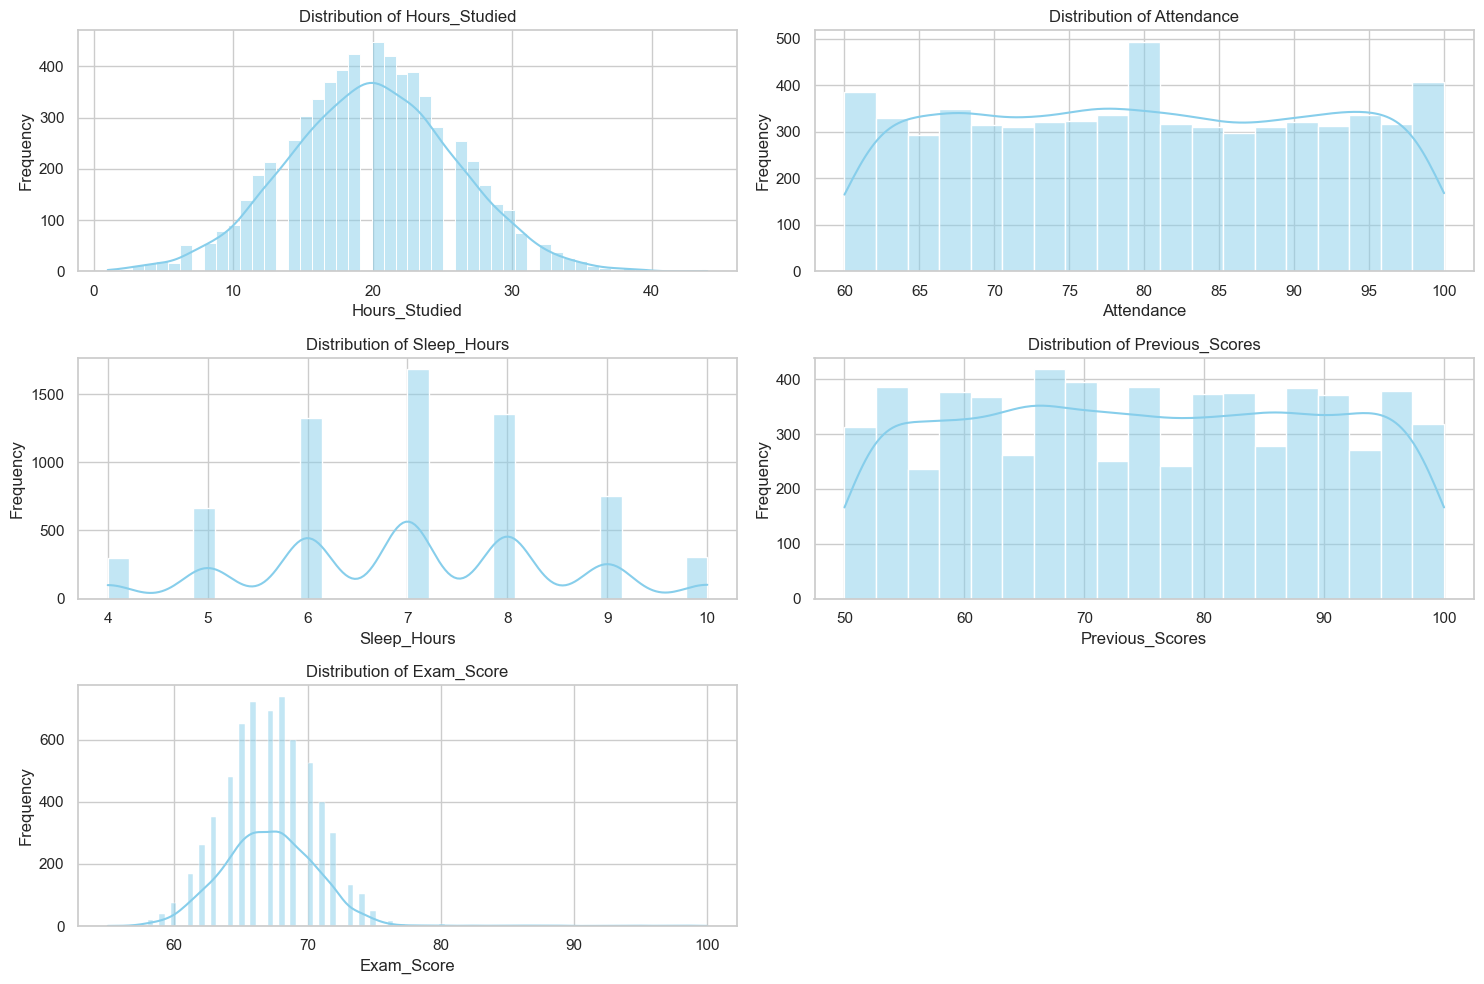

In [16]:
# Set plot aesthetics
sns.set_theme(style="whitegrid")

# Numerical features to visualize
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']

# Create subplots for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    sns.histplot(data=data, x=feature, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Frequency")

# Turn off the last empty subplot if the number of features is odd
if len(numerical_features) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

**Correlation Analysis of Numerical Features**

Understanding relationships between numerical features is crucial for data analysis. A **correlation heatmap** visualizes these relationships, where:

- **Values close to +1** indicate strong positive correlation (e.g., as one feature increases, so does the other).
- **Values close to -1** indicate strong negative correlation (e.g., as one feature increases, the other decreases).
- **Values near 0** suggest no significant relationship.
  
This helps us identify which features might influence the target variable (`Exam_Score`) or are highly related to one another.

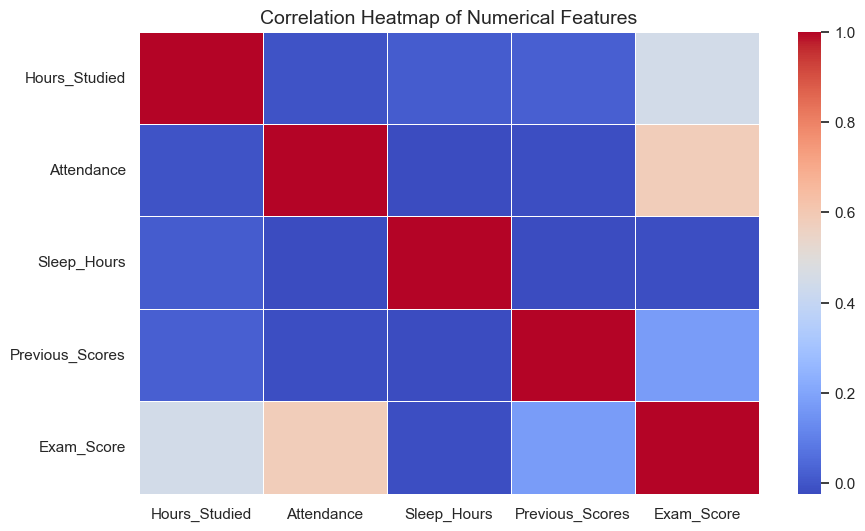

In [17]:
# Compute the correlation matrix for numerical features
correlation_matrix = data[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and labels
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

**Box Plot of Exam Scores by Categorical Features**

A box plot is useful for understanding the distribution and variability of a numerical variable across different categories. Here, we analyze how `Exam_Score` varies based on:

- **Gender**: Are there differences in performance between male and female students?
- **Extracurricular_Activities**: Do students who participate in extracurricular activities perform better?

C:\Users\Khoa\AppData\Local\Temp\ipykernel_31796\1356029084.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Exam_Score', palette='pastel')
C:\Users\Khoa\AppData\Local\Temp\ipykernel_31796\1356029084.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score', palette='pastel')


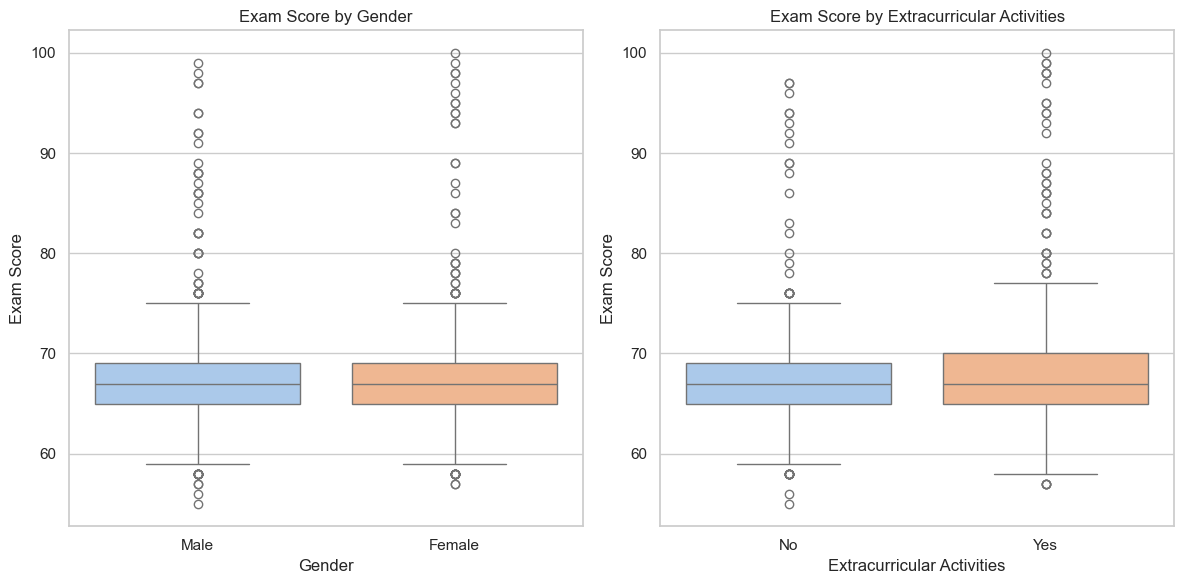

In [18]:
# Map numerical values to text labels for Gender and Extracurricular_Activities
df = data
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({0: 'No', 1: 'Yes'})

# Create box plots for Exam_Score by categorical features with updated labels
plt.figure(figsize=(12, 6))

# Gender vs Exam_Score
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='Exam_Score', palette='pastel')
plt.title('Exam Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Exam Score')

# Extracurricular Activities vs Exam_Score
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score', palette='pastel')
plt.title('Exam Score by Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show();

**Scatter Plot of Exam Scores vs Numerical Features**

Scatter plots reveal trends and relationships between two continuous variables. We'll examine how `Exam_Score` relates to:

- **Hours_Studied**: Does more studying lead to higher scores?
- **Previous_Scores**: Do past performance scores predict final exam results?

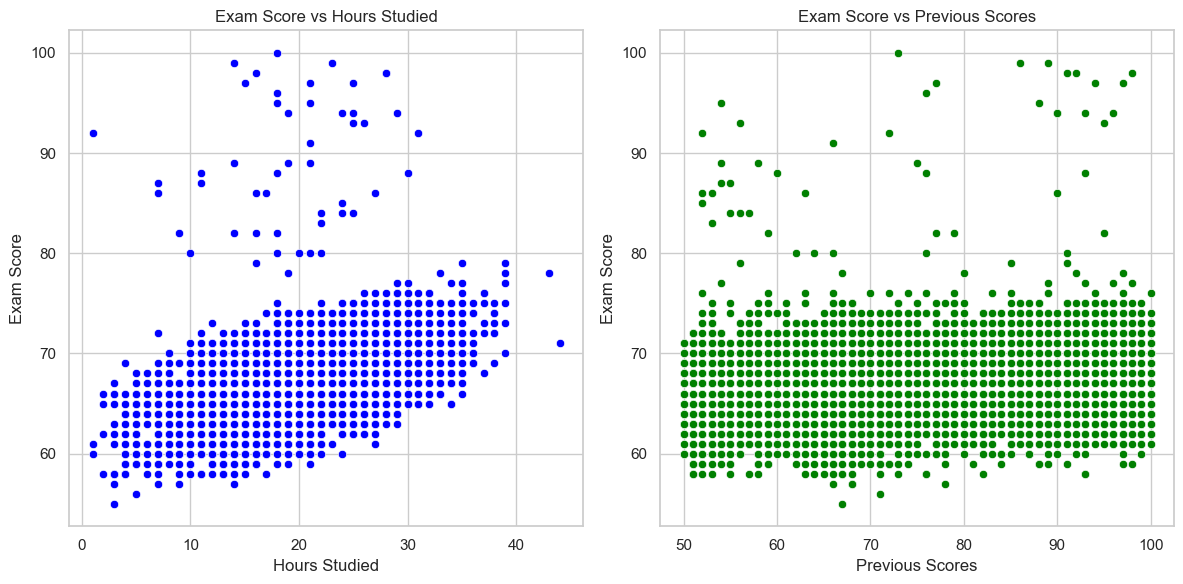

In [19]:
# Create scatter plots for Exam_Score vs other numerical features
plt.figure(figsize=(12, 6))

# Exam_Score vs Hours_Studied
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', color='blue')
plt.title('Exam Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

# Exam_Score vs Previous_Scores
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Previous_Scores', y='Exam_Score', color='green')
plt.title('Exam Score vs Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()


### VI. Ask Meaningful Question

#### 1. Question 1:

In [20]:
# Code here

Comment:

#### 2. Question 2:

In [21]:
# Code here

Comment: 

#### 3. Question 3: 

In [22]:
# Code here

Comment:

#### **4. Question 4: Does the relationship between `Attendance` and `Exam_Score` depend on the levels of `Teacher_Quality` or `Motivation_Level`?**

### Why This Question Arises  

During an exploratory data analysis (EDA) process using `ProfileReport` from `ydata_profiling`, we observed the following insights from the correlation table:  
- `Attendance` has a **strong positive correlation** with `Exam_Score` (r ≈ 0.67).  
- However, other factors like `Teacher_Quality` and `Motivation_Level` also show moderate correlations with `Exam_Score` (r ≈ 0.06 for `Teacher_Quality`, r ≈ 0.07 for `Motivation_Level`).  

These findings suggest that while `Attendance` is a strong predictor of `Exam_Score`, there may be external factors, such as `Teacher_Quality` or `Motivation_Level`, that influence the strength or nature of this relationship.  

This observation motivates the question:  
**"Does the relationship between `Attendance` and `Exam_Score` depend on the levels of `Teacher_Quality` or `Motivation_Level`?"**  

By answering this question, we aim to uncover whether these two variables act as moderators that either strengthen or weaken the positive effect of attendance on exam performance.

---

### Why This Question is Important  

1. **Understand Key Relationships:**  
   This question explores whether `Teacher_Quality` or `Motivation_Level` moderates the relationship between `Attendance` and `Exam_Score`. This helps to better understand the underlying mechanisms behind student performance.  

2. **Educational Insights:**  
   Identifying moderation effects enables educators to tailor interventions more effectively to improve both attendance and performance outcomes.  

3. **Policy Implications:**  
   By understanding how teacher quality or student motivation interacts with attendance, policymakers can design focused strategies to enhance learning environments.

4. **Address Complex Interactions:**  
   This question goes beyond simple pairwise relationships, aiming to uncover deeper, multivariate dynamics in the dataset.

---

### What Can Be Gained  

1. **Actionable Recommendations:**  
   - If teacher quality is a significant moderator, prioritize teacher training in schools where attendance is an issue.  
   - If motivation is a key moderator, focus on fostering intrinsic and extrinsic motivational strategies among students.  

2. **Improved Educational Strategies:**  
   Personalize interventions based on attendance and motivation levels to ensure effective resource utilization and optimal student outcomes.

3. **Enhanced Predictive Models:**  
   Incorporating moderation effects into models makes predictions more robust and provides realistic insights for stakeholders.

4. **Informed Decision-Making:**  
   Educational administrators and policymakers can make data-driven decisions to target critical areas such as teacher quality and student engagement.

---   

### Steps to Answer This Question  

To determine whether `Teacher_Quality` and `Motivation_Level` moderate the relationship between `Attendance` and `Exam_Score`, follow these simplified steps:



1. **Data Preparation**
   - Check for and handle any missing data in the relevant variables (`Attendance`, `Exam_Score`, `Teacher_Quality`, `Motivation_Level`).  
   - Standardize continuous variables (e.g., `Attendance`) for better interpretability in interaction terms.



2. **Exploratory Analysis**
   - Visualize the relationship between `Attendance` and `Exam_Score`, stratified by levels of `Teacher_Quality` and `Motivation_Level`. 
   - Use scatterplots with regression lines or facet grids for better clarity.  
   - Reassess correlations between these variables to understand their direct relationships.



3. **Moderation Analysis**
   - Fit a regression model with interaction terms to test for moderation:  
      - Exam_Score = β0 + β1 * Attendance + β2 * Moderator + β3 * (Attendance * Moderator) + ε 

      - **Explanation of Terms:**
         - **β0**: Intercept, representing the baseline `Exam_Score`.
         - **β1 * Attendance**: Main effect of `Attendance`.
         - **β2 * Moderator**: Main effect of the moderator (e.g., `Teacher_Quality` or `Motivation_Level`).
         - **β3 * (Attendance * Moderator)**: Interaction term, capturing how the effect of `Attendance` on `Exam_Score` changes depending on the moderator.
         - **ε**: Error term, accounting for unexplained variance.
      
      - Test separately for `Teacher_Quality` and `Motivation_Level` as moderators.
      - Check model assumptions (linearity, residual normality, and homoscedasticity) before interpreting results. 



4. **Evaluate Results**
   - Examine the interaction term (`β3`) for significance:  
      - If significant, it indicates a moderation effect.  
   - Visualize the effect using interaction plots, showing the relationship between `Attendance` and `Exam_Score` at different moderator levels.



5. **Interpret and Conclude**
   - Summarize the findings and identify actionable insights:  
     - For example, if `Teacher_Quality` moderates the relationship, consider interventions to improve teacher effectiveness.  
   - If no moderation is found, explore other potential factors.

#### **1. Data Preparation**
*Even though the preprocessing steps have been done above, we still need to double check to make sure everything is on track.*

##### *1.1 Check and Handle Missing Values*

First, we gonna read data in to `dataFrame` named `data`

In [23]:
# Read data in to `dataFrame` named `data`
data = pd.read_csv("./StudentPerformanceFactors_Cleaned.csv")

# Extract four columns: "Attendance", "Motivation_Level", "Teacher_Quality", "Exam_Score"
data = data[["Attendance", "Motivation_Level", "Teacher_Quality", "Exam_Score"]]
data.head()


Attendance  Motivation_Level  Teacher_Quality  Exam_Score
0          84                 0                1          67
1          64                 0                1          61
2          98                 1                1          74
3          89                 1                1          71
4          92                 1                2          70

Then, we move to the next step "Check and handle missing values" 

In [24]:
missing_data = data.isnull().sum()
print("The number of missing values in each column is:\n", missing_data)

The number of missing values in each column is:
 Attendance          0
Motivation_Level    0
Teacher_Quality     0
Exam_Score          0
dtype: int64


We have zero null value, so we can move on to standardize continuous variables (e.g., `Attendance`) for better interpretability in interaction terms.

##### *1.2. Standardize continous variables*

In [25]:
scaler = StandardScaler()
data_std = data.copy()
data_std[['Attendance', 'Exam_Score']] = scaler.fit_transform(data_std[['Attendance', 'Exam_Score']])

print(data_std.head())

   Attendance  Motivation_Level  Teacher_Quality  Exam_Score
0    0.344803                 0                1   -0.063429
1   -1.387019                 0                1   -1.605318
2    1.557079                 1                1    1.735441
3    0.777759                 1                1    0.964496
4    1.037532                 1                2    0.707515


#### **2. Exploratory Analysis**

##### *2.1. Visualize the relationship by Pairplot*

**Visualize the relationship** between `Attendance` and `Exam_Score`, stratified by levels of `Teacher_Quality` and `Motivation_Level`. This will help us understand how the relationship between these variables changes across different categories of teacher quality and motivation level.

In [26]:
data.nunique()

Attendance          41
Motivation_Level     3
Teacher_Quality      3
Exam_Score          44
dtype: int64

**Pairplot of `Attendance` and `Exam_Score`, stratified by `Motivation_Level`**

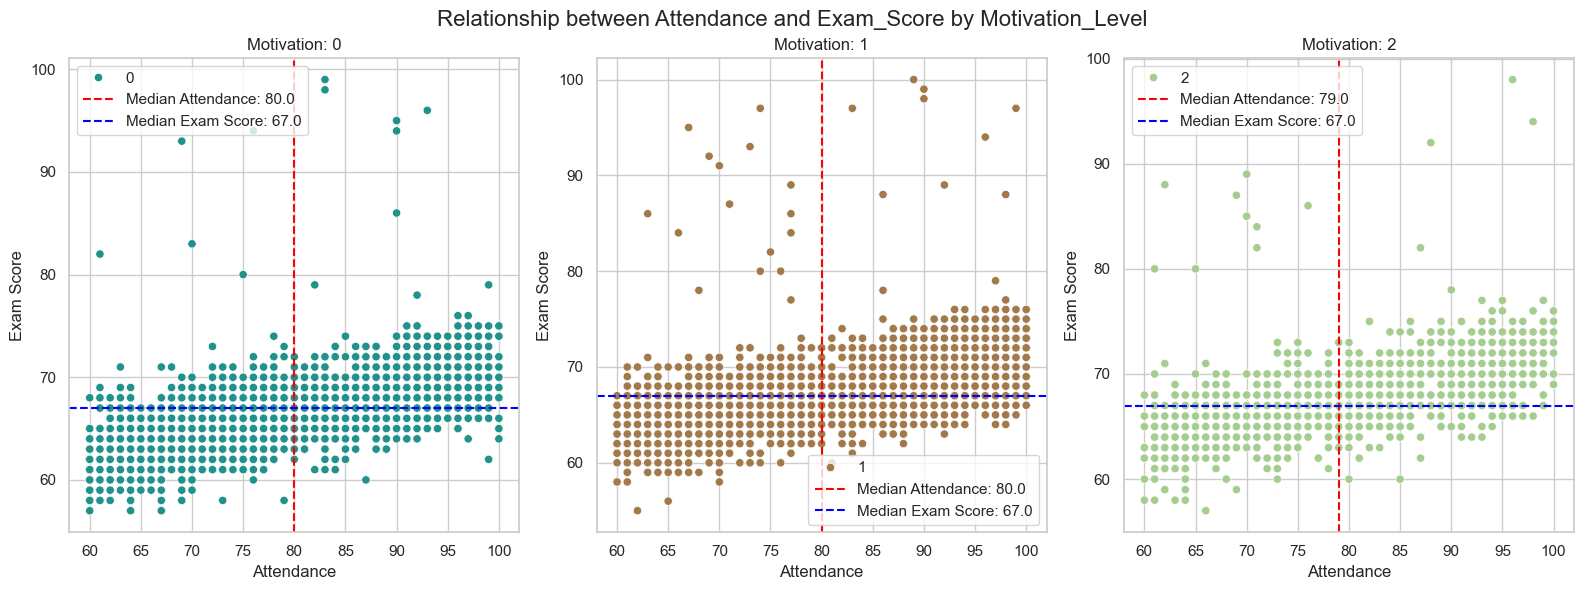

In [27]:
# Tính toán trung vị của Exam_Score và Attendance cho từng nhóm Motivation_Level
medians = data.groupby('Motivation_Level')[['Exam_Score', 'Attendance']].median().reset_index()


# Tạo figure và các subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  # 1 hàng, 3 cột
fig.suptitle('Relationship between Attendance and Exam_Score by Motivation_Level', fontsize=16)

# Các mức của Motivation_Level
motivation_levels = data['Motivation_Level'].unique()

# Tạo một palette với màu sắc khác nhau cho mỗi Motivation_Level
colors = ['viridis', 'cubehelix', 'crest']

# Vẽ biểu đồ cho mỗi mức Motivation_Level
for i, motivation in enumerate(motivation_levels):
        ax = axes[i]  # Chọn subplot tương ứng
        
        # Lọc dữ liệu theo Motivation_Level
        filtered_data = data[data['Motivation_Level'] == motivation]
        
        # Vẽ scatter plot cho từng nhóm
        sns.scatterplot(data=filtered_data, x='Attendance', y='Exam_Score', ax=ax, hue='Motivation_Level', palette=colors[i])
        
        # Thêm tiêu đề cho từng subplot
        ax.set_title(f'Motivation: {motivation}')
        
        # Thêm label cho trục
        ax.set_xlabel('Attendance')
        ax.set_ylabel('Exam Score')

        # Vẽ dòng trung vị cho Attendance và Exam_Score
        median_attendance = medians[medians['Motivation_Level'] == motivation]['Attendance'].values[0]
        median_exam_score = medians[medians['Motivation_Level'] == motivation]['Exam_Score'].values[0]
        
        ax.axvline(x=median_attendance, color='red', linestyle='--', label=f'Median Attendance: {median_attendance}')
        ax.axhline(y=median_exam_score, color='blue', linestyle='--', label=f'Median Exam Score: {median_exam_score}')
        
        # Thêm chú thích cho dòng trung vị
        ax.legend()

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Điều chỉnh khoảng cách với tiêu đề chính

# Hiển thị biểu đồ
plt.show()

**Comment**:
- Based on the **visualizations** and the **median** values, we observe that `Motivation_Level` alone does not appear to be a major determinant in improving `Attendance` and `Exam_Score`.

- The median `Exam_Score` (67) and `Attendance` (80) remain consistent across all levels of `Motivation_Level` (0, 1, 2).

- This suggests that `Motivation_Level` does not significantly influence the relationship between `Attendance` and `Exam_Score`.

**Pairplot of `Attendance` and `Exam_Score`, stratified by `Teacher_Quality`**

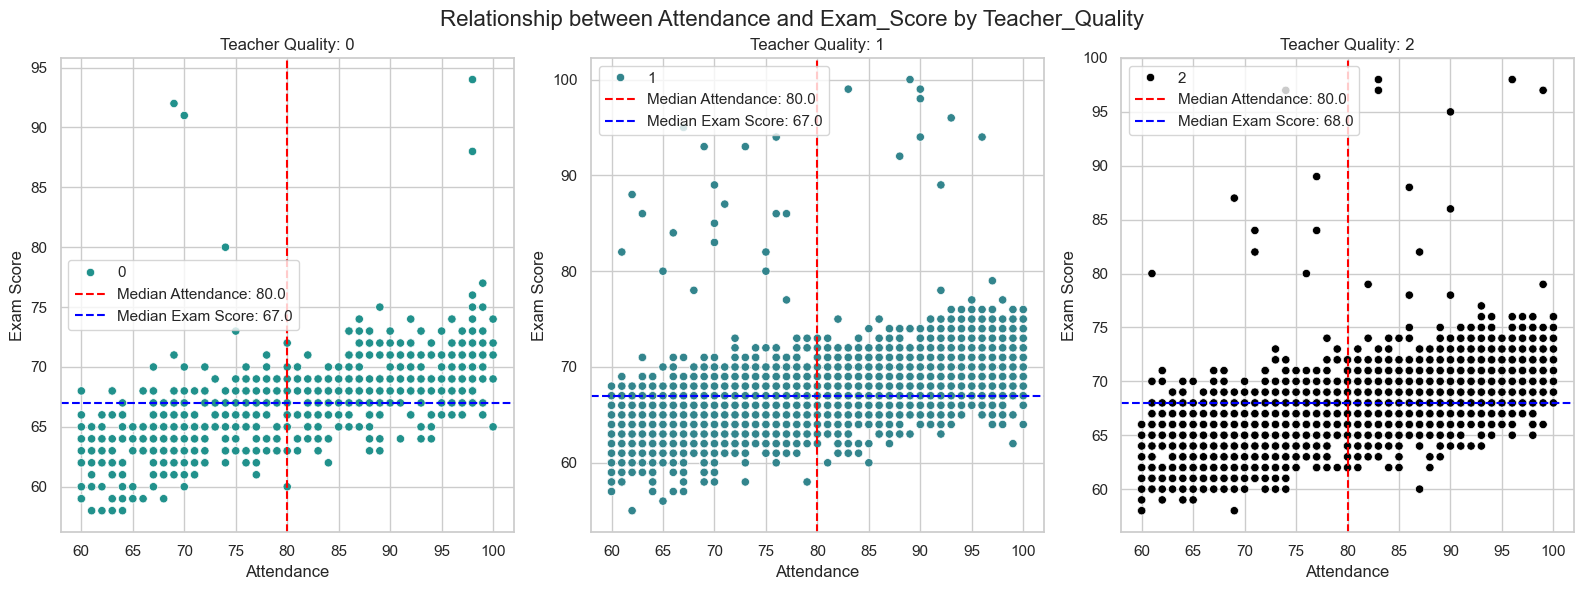

In [28]:
medians_2 = data.groupby('Teacher_Quality')[['Exam_Score', 'Attendance']].median().reset_index()

# Tạo figure và các subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))  # 1 hàng, 3 cột
fig.suptitle('Relationship between Attendance and Exam_Score by Teacher_Quality', fontsize=16)

# Các mức của Teacher_Quality
teacher_quality_levels = data['Teacher_Quality'].unique()
teacher_quality_levels.sort()

# Tạo một palette với màu sắc khác nhau cho mỗi Teacher_Quality
colors = ['viridis', 'crest', 'cubehelix']

# Vẽ biểu đồ cho mỗi mức Teacher_Quality 
for i, quality in enumerate(teacher_quality_levels):
        ax = axes[i]  # Chọn subplot tương ứng
        
        # Lọc dữ liệu theo Teacher_Quality
        filtered_data = data[data['Teacher_Quality'] == quality]
        
        # Vẽ scatter plot cho từng nhóm
        sns.scatterplot(data=filtered_data, x='Attendance', y='Exam_Score', ax=ax, hue='Teacher_Quality', palette=colors[i])
        
        # Thêm tiêu đề cho từng subplot
        ax.set_title(f'Teacher Quality: {quality}')
        
        # Thêm label cho trục
        ax.set_xlabel('Attendance')
        ax.set_ylabel('Exam Score')

        # Vẽ dòng trung vị cho Attendance và Exam_Score
        median_attendance = medians_2[medians_2['Teacher_Quality'] == quality]['Attendance'].values[0]
        median_exam_score = medians_2[medians_2['Teacher_Quality'] == quality]['Exam_Score'].values[0]
        
        ax.axvline(x=median_attendance, color='red', linestyle='--', label=f'Median Attendance: {median_attendance}')
        ax.axhline(y=median_exam_score, color='blue', linestyle='--', label=f'Median Exam Score: {median_exam_score}')
        
        # Thêm chú thích cho dòng trung vị
        ax.legend()

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Điều chỉnh khoảng cách với tiêu đề chính

# Hiển thị biểu đồ
plt.show()

**Comment**: 
- The median `Exam_Score` (67) and `Attendance` (80) are the same for `Teacher_Quality` levels 0 and 1.

- At `Teacher_Quality` = 2, the median `Exam_Score` slightly increases to 68 while `Attendance` remains unchanged.

- This indicates that `Teacher_Quality` may have a minimal impact on improving `Exam_Score`.

##### *2.2. Reassessing Correlations*

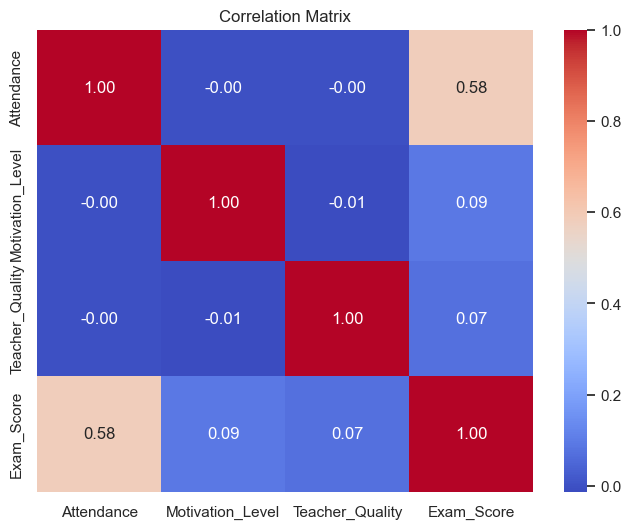

Correlation (Attendance vs Exam_Score) for Teacher_Quality = 1: 0.58
Correlation (Attendance vs Exam_Score) for Teacher_Quality = 2: 0.58
Correlation (Attendance vs Exam_Score) for Teacher_Quality = 0: 0.60
Correlation (Attendance vs Exam_Score) for Motivation_Level = 0: 0.59
Correlation (Attendance vs Exam_Score) for Motivation_Level = 1: 0.58
Correlation (Attendance vs Exam_Score) for Motivation_Level = 2: 0.58


In [29]:
# 1. Correlation Matrix
correlation_matrix = data.corr()

# 2. Visualize Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 3. Stratified Correlation Analysis
for teacher_quality in data['Teacher_Quality'].unique():
    subset = data[data['Teacher_Quality'] == teacher_quality]
    corr = subset[['Attendance', 'Exam_Score']].corr().iloc[0, 1]
    print(f"Correlation (Attendance vs Exam_Score) for Teacher_Quality = {teacher_quality}: {corr:.2f}")

for motivation_level in data['Motivation_Level'].unique():
    subset = data[data['Motivation_Level'] == motivation_level]
    corr = subset[['Attendance', 'Exam_Score']].corr().iloc[0, 1]
    print(f"Correlation (Attendance vs Exam_Score) for Motivation_Level = {motivation_level}: {corr:.2f}")

**Comment**:
1. **Overall Correlation Consistency**:

    - The correlation between `Attendance` and `Exam_Score` remains relatively consistent across all levels of `Teacher_Quality` (0.58–0.60) and `Motivation_Level` (0.58–0.59).
    - This suggests that neither `Teacher_Quality` nor `Motivation_Level` significantly alters the strength of the relationship between `Attendance` and `Exam_Score`.

2. **Strength of Correlation:**

    - The correlations (0.58–0.60) indicate a moderate positive relationship between `Attendance` and `Exam_Score`.
    - Higher attendance is moderately associated with higher exam scores, but the effect size is not particularly large.

3. **Minimal Variation Across Groups:**

    - The minor differences in correlation values across levels (maximum difference: 0.02) suggest that `Teacher_Quality` and `Motivation_Level` are not substantial moderators of the `Attendance`-`Exam_Score` relationship.

#### **3. Moderation Analysis** 

**Why use this model?**

*To analyze whether the relationship between `Attendance` and `Exam_Score` changes depending on the level of another variable (the moderator) we gonna use the [Moderation (statistics) equation](https://en.wikipedia.org/wiki/Moderation_(statistics)):*
<center> Exam_Score = β0 + β1 * Attendance + β2 * Moderator + β3 * (Attendance * Moderator) + ε <center>



---

**Rationale for Using This Model:**

1. **Exam_Score as the Dependent Variable**

    - The primary interest is to understand factors influencing `Exam_Score`. This model allows us to examine how:
        - **Direct attendance** affects `Exam_Score` (β1)
        - The **moderator’s main** effect (β2)
        - The interaction between `Attendance` and the moderator (β3) influences the outcome.

2. **Moderation Analysis**

    - Moderation analysis is vital when exploring:

        - How external factors (`Teacher_Quality`, `Motivation_Level`) shape the strength or direction of a relationship.
        - Potential customized interventions for improving outcomes based on specific groups or conditions.

3. **Flexibility**

    - The model is scalable for multiple moderators or covariates, allowing more comprehensive insights.


##### *3.1. Fit the Moderation Model*


a. **`Teacher_Quality` attribute**

In [30]:
# Prepare datadata
data_std['Interaction_TQ'] = data_std['Attendance'] * data_std['Teacher_Quality']
X = sm.add_constant(data_std[['Attendance', 'Teacher_Quality', 'Interaction_TQ']])
y = data_std['Exam_Score']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1114.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:41:10   Log-Likelihood:                -7704.5
No. Observations:                6377   AIC:                         1.542e+04
Df Residuals:                    6373   BIC:                         1.544e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1492      0.023     

**Comment**

1. **Analysis and Insights Related to the Research Question**
    - **Direct Relationship Between `Attendance` and `Exam_Score`**

        - The coefficient for `Attendance` (0.576, p < 0.001) indicates a strong and significant positive relationship between class attendance and exam scores.
        - This suggests that frequent attendance positively impacts academic performance.

    - **Role of `Teacher_Quality`**

        - The coefficient for `Teacher_Quality` (0.1246, p < 0.001) shows a positive and statistically significant relationship with exam scores.
        - This implies that teacher quality contributes to better academic performance, but its impact is smaller compared to attendance.

    - **Interaction Between `Attendance` and `Teacher_Quality`**

        - The interaction term (`Interaction_TQ`: 0.0049, p = 0.770) is not statistically significant.
        - This suggests that `Teacher_Quality` does not moderate the relationship between `Attendance` and Exam_Score.
        - In other words, the effect of attendance on exam scores is almost independent of teacher quality.

    - **Future Directions**

        - While `Teacher_Quality` is not a significant moderator, the role of `Motivation_Level` needs further investigation to determine if it alters the relationship between attendance and exam scores.
        - Additionally, other factors not included in the current model, such as the learning environment, family support, or curriculum content, may act as mediators or moderators.

2. **Preliminary Conclusion**

    - **Partial Answer to the Research Question:**

        - `Teacher_Quality` is not a significant moderator in the relationship between `Attendance` and `Exam_Score`.
        - Further analysis is required to explore the potential moderating role of `Motivation_Level`.

b. **`Motivation_Level` attribute**

In [34]:
# Prepare datadata
data_std['Interaction_ML'] = data_std['Attendance'] * data_std['Motivation_Level']
X = sm.add_constant(data_std[['Attendance', 'Motivation_Level', 'Interaction_ML']])
y = data_std['Exam_Score']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     1128.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:11:24   Log-Likelihood:                -7690.4
No. Observations:                6377   AIC:                         1.539e+04
Df Residuals:                    6373   BIC:                         1.542e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1202      0.017  

**Comment:**
1. **Results of the Analysis for "`Motivation_Level`":**
    - **Relationship between `Attendance` and `Exam_Score`:** 
        - Similar to `Teacher_Quality`, `Attendance` has a strong impact on `Exam_Score` with a coefficient (coef) of 0.5904 and a p-value < 0.05. This suggests that class attendance positively influences exam scores.

    - **Relationship between `Motivation_Level` and `Exam_Score`:** 
        - `Motivation_Level` also significantly affects the exam score, with a coefficient of 0.1323 and a p-value < 0.05. This indicates that different levels of motivation may influence exam performance.

    - **Interaction between `Attendance` and `Motivation_Level`:**
        - The interaction term (`Interaction_ML`) has a coefficient of -0.0094 and a p-value of 0.516 (greater than 0.05), suggesting that there is no significant moderation effect from the interaction between attendance and motivation level. This reinforces the conclusion that motivation level does not significantly affect the relationship between attendance and exam scores.

2. **Conclusion from the Model:**
    - The relationship between Attendance and Exam_Score is not moderated by `Motivation_Level` (similar to `Teacher_Quality`), as the interaction term is not statistically significant.

#### **4. Evaluate Results**

##### *4.1 Visualize interactive effects*

*Direct effect of `Attendance` vs `Exam_Score*`

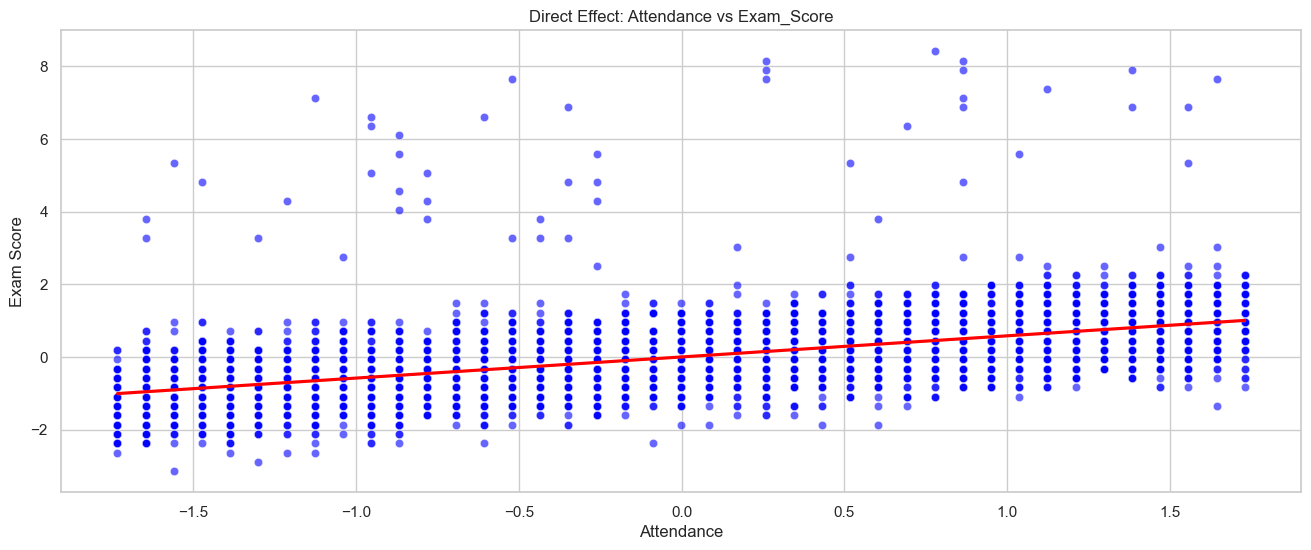

In [48]:
# Create a figure
plt.figure(figsize=(16, 6))

# Plot 1: Attendance vs Exam_Score with trend line
sns.scatterplot(
    data=data_std, x='Attendance', y='Exam_Score',  alpha=0.6, color='blue'
)
sns.regplot(
    data=data_std, x='Attendance', y='Exam_Score',  scatter=False, color='red'
)
plt.title('Direct Effect: Attendance vs Exam_Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()


a. **`Teacher_Quality` attribute**

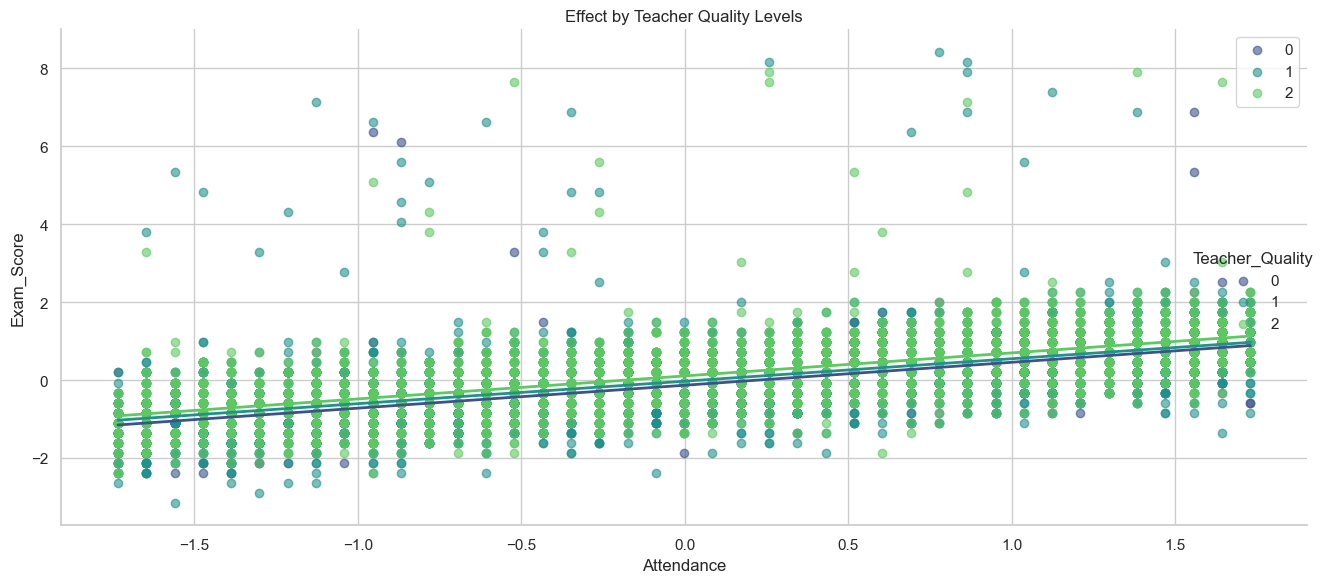

In [46]:
# Plot 2: Attendance vs Exam_Score by Teacher_Quality levels
sns.lmplot(
    data=data_std,
    x='Attendance',
    y='Exam_Score',
    hue='Teacher_Quality',
    palette='viridis',
    height=6,
    aspect=2,
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2},
    ci=None,
)
plt.title('Effect by Teacher Quality Levels')
plt.legend()
# Adjust layout for better visibility
plt.tight_layout()
plt.show()

b. **`Motivation_Level` attribute**

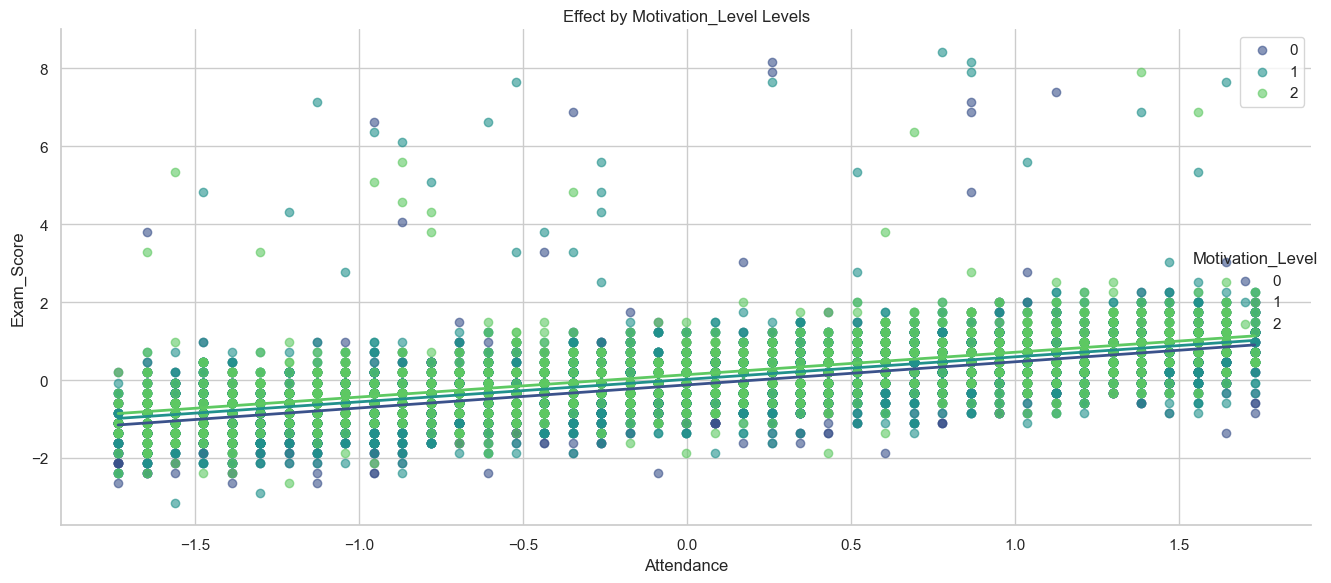

In [47]:
# Plot 3: Attendance vs Exam_Score by Motivation_Level levels
sns.lmplot(
    data=data_std,
    x='Attendance',
    y='Exam_Score',
    hue='Motivation_Level',
    palette='viridis',
    height=6,
    aspect=2,
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2},
    ci=None,
)
plt.title('Effect by Motivation_Level Levels')
plt.legend()

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

c. **Comment**
- The visualizations support the conclusion that `Teacher_Quality` and `Motivation_Level` are not significant moderators in the relationship between `Attendance` and `Exam_Score`. 
- Changes in class attendance do not show significant differences depending on the levels of these factors. 
- Therefore, improving `Teacher_Quality` and `Motivation_Level` may improve exam scores, but it does not alter the fundamental relationship between `Attendance` and `Exam_Score`

#### **5. Interpret and Conclude**
##### **Summary of Findings:**

- **Attendance and Exam Score**: There is a strong, positive relationship between `Attendance` and `Exam_Score`, indicating that higher attendance is associated with better exam performance.
  
- **Teacher Quality**: While `Teacher_Quality` does have a significant direct effect on `Exam_Score`, the interaction between `Attendance` and `Teacher_Quality` is not significant. This suggests that `Teacher_Quality` does not moderate the relationship between attendance and exam scores, meaning the effect of attendance on exam scores is largely independent of the teacher's quality.

- **Motivation Level**: Similarly, while `Motivation_Level` also significantly affects `Exam_Score`, the interaction term between `Attendance` and `Motivation_Level` is not significant. This suggests that motivation level does not significantly moderate the relationship between attendance and exam scores.

##### **Actionable Insights:**

1. **Teacher Quality**: Since `Teacher_Quality` does not moderate the relationship between `Attendance` and `Exam_Score`, improving teacher effectiveness may still be beneficial for enhancing overall exam performance, but it may not directly influence the impact of attendance on exam scores.

2. **Motivation**: While motivation is significant in its own right, interventions targeting motivation may be more useful as standalone efforts rather than attempts to modify how attendance influences exam scores.

3. **Focus on Attendance**: Since `Attendance` is the most significant predictor of `Exam_Score`, schools and educational institutions could focus on improving attendance through interventions, such as providing incentives for high attendance or addressing factors that contribute to poor attendance.